In [1]:
!pip install pandas


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

In [3]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
df = pd.read_csv(r"C:\Users\AKHILA\Downloads\complaints.csv\complaints.csv", encoding="utf-8", low_memory=False)


In [5]:
# Check which column is index 16
column_16 = df.columns[16]
print(f"\nColumn 16 name: {column_16}")
print(f"Unique values in {column_16}:")
print(df[column_16].unique())
print(f"\nValue counts in {column_16}:")
print(df[column_16].value_counts())


Column 16 name: Consumer disputed?
Unique values in Consumer disputed?:


[nan 'No' 'Yes']

Value counts in Consumer disputed?:
Consumer disputed?
No     619928
Yes    148378
Name: count, dtype: int64


In [6]:
# Check the data
print("Dataset shape:", df.shape)
print("\nColumns in the dataset:")
for col in df.columns:
    print(f"- {col}")

Dataset shape: (7842554, 18)

Columns in the dataset:
- Date received
- Product
- Sub-product
- Issue
- Sub-issue
- Consumer complaint narrative
- Company public response
- Company
- State
- ZIP code
- Tags
- Consumer consent provided?
- Submitted via
- Date sent to company
- Company response to consumer
- Timely response?
- Consumer disputed?
- Complaint ID


In [7]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique values in 'Product' column
print("\nUnique Products:")
print(df['Product'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842554 entries, 0 to 7842553
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

In [8]:
# Remove unnecessary columns
columns_to_keep = ['Product', 'Sub-product', 'Issue', 'Sub-issue',
                   'Consumer complaint narrative', 'Company', 'State',
                   'Consumer consent provided?', 'Submitted via']
df = df[columns_to_keep]

# Handle missing values in narrative
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')

# Combine text fields for better feature representation
df['combined_text'] = (df['Consumer complaint narrative'] + ' ' +
                      df['Issue'].fillna('') + ' ' +
                      df['Sub-issue'].fillna(''))

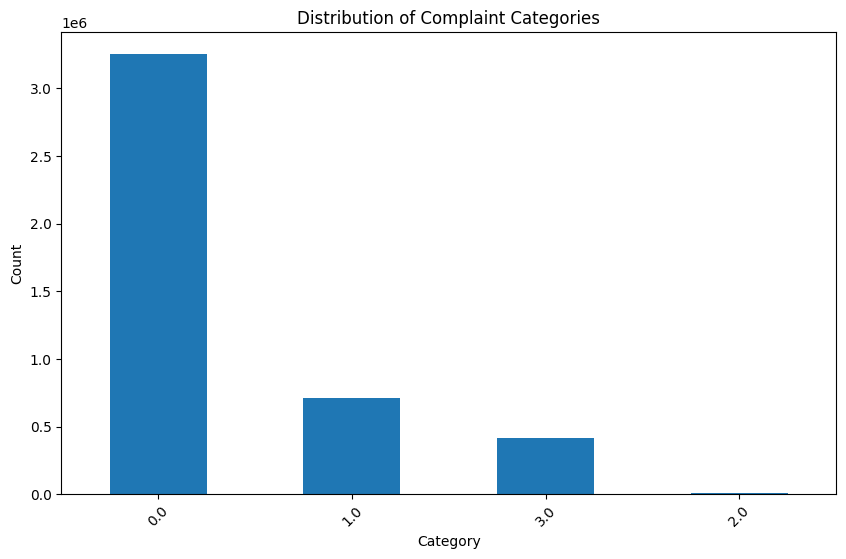

In [9]:
# Create category mapping
category_mapping = {
    'Credit reporting or other personal consumer reports': 0,  # Credit reporting, repair, or other
    'Debt collection': 1,                                     # Debt collection
    'Payday loan, title loan, personal loan, or advance loan': 2,  # Consumer Loan
    'Mortgage': 3                                            # Mortgage
}

# Map products to categories
df['category'] = df['Product'].map(category_mapping)

# Remove rows with unmapped categories
df = df[df['category'].notna()]

# Display category distribution
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
# Ensure you have downloaded 'punkt', 'stopwords', and 'wordnet' beforehand

def preprocess_text(text):
    """
    Text preprocessing function for VS Code execution
    """
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove 'XXXX' patterns
    text = re.sub(r'xxxx+', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    return ' '.join(tokens)

In [13]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional for lemmatization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AKHILA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
print(df.columns)  # Display all column names

Index(['Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company', 'State',
       'Consumer consent provided?', 'Submitted via', 'combined_text',
       'category'],
      dtype='object')


In [16]:
df["clean_text"] = df["combined_text"].apply(preprocess_text)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [18]:
# ✅ Convert text into numerical features (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["category"]

In [19]:
# ✅ Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [20]:
# ✅ Train Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [21]:
# ✅ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# ✅ Predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


🔹 Logistic Regression Model Performance:
Accuracy: 0.9961243252681845
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    975607
         1.0       1.00      1.00      1.00    213370
         2.0       0.93      0.75      0.83      3833
         3.0       0.99      0.98      0.99    124380

    accuracy                           1.00   1317190
   macro avg       0.98      0.93      0.95   1317190
weighted avg       1.00      1.00      1.00   1317190


Confusion Matrix:


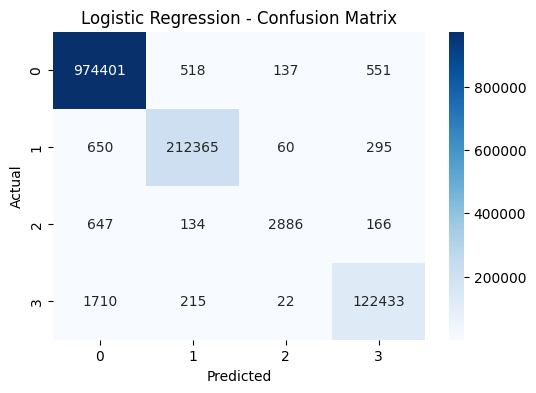


🔹 Random Forest Model Performance:
Accuracy: 0.9972691866777003
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    975607
         1.0       1.00      1.00      1.00    213370
         2.0       0.99      0.62      0.76      3833
         3.0       0.99      0.99      0.99    124380

    accuracy                           1.00   1317190
   macro avg       1.00      0.90      0.94   1317190
weighted avg       1.00      1.00      1.00   1317190


Confusion Matrix:


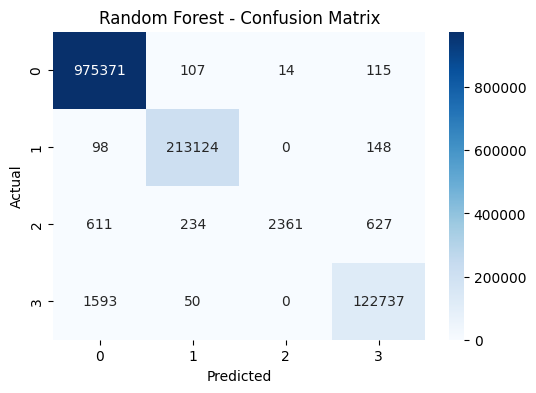

In [23]:
# ✅ Evaluation Metrics
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n🔹 {model_name} Model Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)


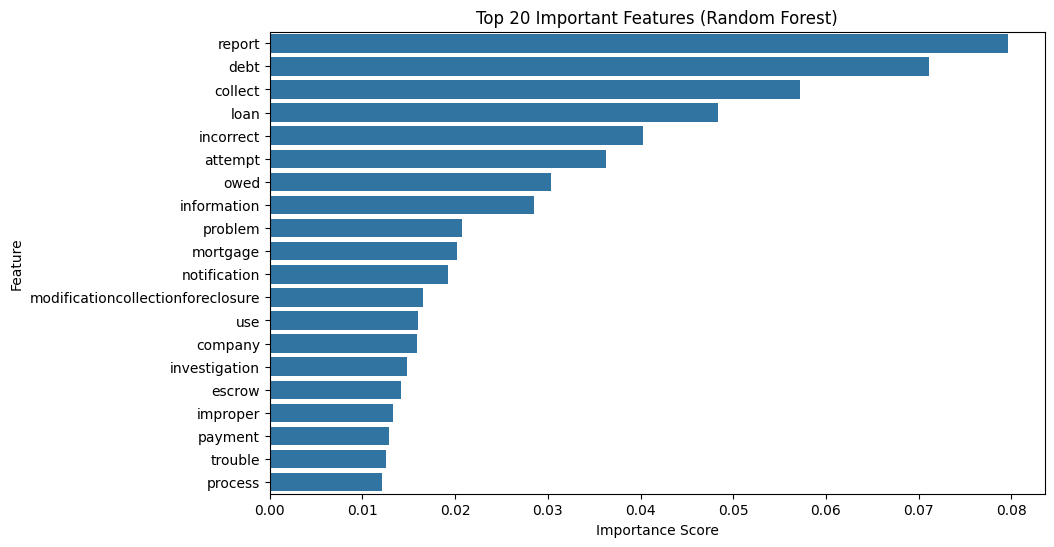

In [24]:
# ✅ Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
important_features = sorted(zip(feature_importances, feature_names), reverse=True)[:20]

plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in important_features], y=[x[1] for x in important_features])
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [25]:
# ✅ Hyperparameter Tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100]}
grid_log = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)

print("\nBest Hyperparameters for Logistic Regression:", grid_log.best_params_)
print("Best Training Accuracy (Logistic Regression):", grid_log.best_score_)
print("Test Accuracy (Logistic Regression):", accuracy_score(y_test, grid_log.best_estimator_.predict(X_test)))


Best Hyperparameters for Logistic Regression: {'C': 10}
Best Training Accuracy (Logistic Regression): 0.9960301824788557
Test Accuracy (Logistic Regression): 0.995852534562212


In [26]:
def predict_new_complaints(model, new_texts):
    # Preprocess text
    new_texts_cleaned = [preprocess_text(text) for text in new_texts]

    # Convert to TF-IDF
    new_texts_vectorized = vectorizer.transform(new_texts_cleaned)

    # Predict
    predictions = model.predict(new_texts_vectorized)

    # Map category back to label
    category_mapping_reverse = {v: k for k, v in category_mapping.items()}
    predicted_labels = [category_mapping_reverse[pred] for pred in predictions]

    return predicted_labels

# Example new complaints
new_complaints = [
    "I have issues with my credit score reporting. The data is inaccurate.",
    "The bank is harassing me for debt collection, and I am getting threats.",
    "I took a personal loan and the company is charging excessive fees.",
    "My mortgage lender is refusing to accept my payments and threatening foreclosure."
]

# Predict using best model (Random Forest or Logistic Regression)
predictions_rf = predict_new_complaints(rf_model, new_complaints)
predictions_log = predict_new_complaints(log_model, new_complaints)

print("\n🔹 Predictions (Random Forest):", predictions_rf)
print("🔹 Predictions (Logistic Regression):", predictions_log)



🔹 Predictions (Random Forest): ['Credit reporting or other personal consumer reports', 'Debt collection', 'Mortgage', 'Mortgage']
🔹 Predictions (Logistic Regression): ['Credit reporting or other personal consumer reports', 'Debt collection', 'Payday loan, title loan, personal loan, or advance loan', 'Mortgage']


In [27]:
pip install imbalanced-learn


In [29]:
from imblearn.over_sampling import SMOTE


In [30]:
from sklearn.model_selection import StratifiedKFold


In [32]:
# ✅ Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [34]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=3000, alternate_sign=False)  # No huge matrix stored
X = vectorizer.transform(df["clean_text"])  # No `fit_transform()`, avoids memory issues


In [35]:
# ✅ Train-Test Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [37]:
# ✅ Convert text into numerical features using Memory-Efficient HashingVectorizer
vectorizer = HashingVectorizer(n_features=3000, alternate_sign=False)  # Avoids memory issues
X = vectorizer.transform(df["clean_text"])  # No fit_transform, processes efficiently
y = df["category"]

In [38]:
# ✅ Train-Test Split (70-30) with Stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# ✅ Apply SMOTE to balance classes (if dataset is imbalanced)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# ✅ Train Logistic Regression with Regularization (Lower C for better generalization)
tuned_log_model = LogisticRegression(C=1, max_iter=500)
tuned_log_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# ✅ Train Random Forest with Depth Constraints (Prevents Overfitting)
tuned_rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42
)
tuned_rf_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
# ✅ Predictions
y_pred_log = tuned_log_model.predict(X_test)
y_pred_rf = tuned_rf_model.predict(X_test)

In [ ]:
# ✅ Model Evaluation Function
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n🔹 {model_name} Model Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()